<a href="https://colab.research.google.com/github/dnewton090/COVID-19/blob/main/COVID-19_April-20_DX%26M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IFQ509 COVID-19 Data Exploration & Mining 

###  Doug Newton & Gandip Khaling  
Assignment 1, TP4, Nov 2020

### Instructions on how to parse this notebook

* Certain charts have been repeated from multiple angles, as a way of learning python & coming together on different ways to do things

* Plotly interactive charting enables hovering, and select/deselecting of series from the legend

## Importing packages & uploading the data 

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For GIF image creation
import PIL 
import io

%matplotlib inline

In [ ]:
# Importing Plotly interactive charting & pandas connection Cufflinks 

import cufflinks as cf

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
# Raw dataset imports

confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("time_series_covid19_recovered_global.csv")

# Test dataframes have persisted
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,40,43,54,99,112,131,135,150,166,179
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,248,251,277,283,302,314,327,345,356,385
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,691,708,783,846,894,1047,1099,1152,1204,1355
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,128,169,169,191,205,235,248,282,309,333
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,5,5,5,5,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### There are less cells in Recoveries

In [ ]:
# Check the size of each df
print("Rows in Confirmed: \t", len(confirmed))
print("Rows in Deaths: \t", len(deaths))
print("Rows in Recoveries: \t", len(recovered))

Rows in Confirmed: 	 264
Rows in Deaths: 	 264
Rows in Recoveries: 	 250


In [ ]:
# Data Exploration:  Looking for non.null values and consistent dTypes
## .value_counts() just to supress the output_size

confirmed.info()
deaths.info()
recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 97 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 97 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  67 non-null     object 
 1   Country/Region  250 non-null    object 
 2   Lat             250 non-null    float64
 3   Long            250 non-null    float64
 4   1/22/20         250 non-null    int64  
 5   1/23/20         250 non-null    int64  
 6   1/24/20         250 non-null    int64  
 7   1/25/20         250 non-null    int64  
 8   1/26/20         250 non-null    int64  
 9   1/27/20         250 non-null    int64  
 10  1/28/20         250 non-null    int64  
 11  1/29/20         250 non-null    int64  
 12  1/30/20         250 non-null    int64  
 13  1/31/20         250 non-null    int64  
 14  2/1/20          250 non-null    int64  
 15  2/2/20          250 non-null    int64  
 16  2/3/20          250 non-null    int64  
 17  2/4/20          250 non-null    int

In [ ]:
# Checking Null values:  although this IDs the provinces
deaths['Country/Region'].isnull().values.any()

False

In [ ]:
# Checking total entries
len(recovered.iloc[:,1]), len(confirmed.iloc[:,1]), len(deaths.iloc[:,1])

(250, 264, 264)

In [ ]:
# All datasets have the same country counts.  Need to move to a multi-level index
print("Countries in ConfirmedSet: \t", len(set(confirmed["Country/Region"])))
print("Countries in DeathSet: \t\t", len(set(deaths["Country/Region"])))
print("Countries in RecoveredSet: \t", len(set(recovered["Country/Region"])))

Countries in ConfirmedSet: 	 185
Countries in DeathSet: 		 185
Countries in RecoveredSet: 	 185


In [ ]:
# Recovered data shows 15x less states
print("States with Recovered Data: \t", len(set(recovered["Province/State"])))
print("States with Confirmed Data: \t",len(set(confirmed["Province/State"])))
print("States with Deaths Data: \t", len(set(deaths["Province/State"])))

States with Recovered Data: 	 68
States with Confirmed Data: 	 83
States with Deaths Data: 	 83


In [ ]:
# What's causing the discrepancy in Recoveries data
# Looks like Canada, 'ey?  What're you talking aboot?

set(confirmed["Province/State"]) - set(recovered["Province/State"])

{'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Recovered',
 'Saskatchewan',
 'Yukon'}

In [ ]:
# Check all countries present are the same
set_recovered = set(recovered.iloc[:,1])
set_confirmed = set(confirmed.iloc[:,1])
set_deaths = set(confirmed.iloc[:,1])
set_recovered == set_confirmed == set_deaths

True

### We need to create an index in order to perform calcs across:
* Actives = Confirmed - Deaths - Recoveries 


In [ ]:
# Check consistency in column dTypes
confirmed.info()
deaths.info()
recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 97 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

In [ ]:
# Seems to be minimum data of (-1) which cannot be correct. Replace with 0. 
confirmed.describe()

#Use eq() function to find our number
confirmed[confirmed.eq(-1).any(1)]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20


In [ ]:
#Replaceing value of -1 with 0 
confirmed = confirmed.replace([-1], [ 0]) 
deaths = deaths.replace([-1], [ 0]) 
recovered = recovered.replace([-1], [ 0]) 

# Recheck
confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,21.317326,22.168315,2.102273,2.477273,3.564394,5.431818,8.022727,11.087121,21.128788,23.356061,...,7485.575758,7788.087121,8153.174242,8485.571970,8779.390152,9095.083333,9364.617424,9655.768939,9939.738636,10260.928030
std,24.734994,70.669996,27.382118,27.480921,34.210982,47.612615,66.537101,89.647535,220.011922,221.352587,...,42450.795244,44263.147941,46362.494852,48389.900988,50329.620566,52089.315270,53671.773575,55406.732015,57161.869388,58985.532148
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.969250,-20.026050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,40.750000,48.000000,48.750000,51.250000,55.000000,55.000000,59.250000,64.000000,64.500000,71.500000
50%,23.488100,20.535638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,304.000000,319.000000,331.500000,335.000000,339.000000,341.500000,343.500000,352.500000,357.000000,380.500000
75%,41.166075,78.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1379.750000,1407.500000,1533.250000,1575.500000,1615.750000,1654.250000,1678.500000,1737.500000,1787.500000,1797.750000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,607670.000000,636350.000000,667592.000000,699706.000000,732197.000000,758809.000000,784326.000000,811865.000000,840351.000000,869170.000000


In [ ]:
# Check for missing values across all dates
# Index slicing all rows, and date cols; set Bool=0=True, Count

print("Confirmed:\t", confirmed.loc[:,"1/22/20":].isna().sum().value_counts())
print("\nDeaths:\t\t", deaths.loc[:,"1/22/20":].isna().sum().value_counts())
print("\nRecovered:\t", recovered.loc[:,"1/22/20":].isna().sum().value_counts())
 

Confirmed:	 0    93
dtype: int64

Deaths:		 0    93
dtype: int64

Recovered:	 0    93
dtype: int64


###  Can we create custom functions to make life easier? 
* Data wrangling exercise:  Gandip's functions

In [ ]:
#grouping Function
def ctry(df):
    
    df=df.drop(columns=['Lat', 'Long','Province/State']).groupby('Country/Region').sum()
    #df.reset_index(level=0, inplace=True)
    return df

#Function for interactive chart. Accept any Dataframe ,Countrylist should be series/String,Title need to be String. 
def interactive_line(df,countrylist,title):
    
    fig = px.line(title=title)
    for i in countrylist:
        fig.add_scatter(x = df.index.values, y = df.loc[:,i].values, name = i)        
        
        
    fig.show()
#function to chart log
def interactive_line_log(df,countrylist,title):
    
    fig = px.line(title=title)
    fig.update_yaxes(type="log")
    for i in countrylist:
        fig.add_scatter(x = df.index.values, y = df.loc[:,i].values, name = i)        
        
        
    fig.show()
#function for charting Active Cases','Total Confirmed Cases','Deaths','Recoveries','CFR' takes one country

def multi_chart(country):
    
    fig = make_subplots(rows=3, cols=2,subplot_titles=('Active Cases','Total Confirmed Cases','Deaths','Recoveries','CFR'),vertical_spacing=0.25)
    
    fig.add_trace(go.Scatter(x=ctry_activesT.index.values,y=ctry_activesT.loc[:,country].values,mode="lines+markers",name="Active Cases"), row=1, col=1)
    fig.add_trace(go.Scatter(x=ctry_confirmedT.index.values,y=ctry_confirmedT.loc[:,country].values,mode="lines+markers",name="Total Confirmed Case"), row=1, col=2)
    fig.add_trace(go.Scatter(x=ctry_deathsT.index.values,y=ctry_deathsT.loc[:,country].values,mode="lines+markers",name="Death"), row=2, col=1)
    fig.add_trace(go.Scatter(x=ctry_recoveredT.index.values,y=ctry_recoveredT.loc[:,country].values,mode="lines+markers",line=go.scatter.Line(color="Green"),name="Recovered"), row=2, col=2)
    fig.add_trace(go.Scatter(x=CFR_countriesT.index.values,y=CFR_countriesT.loc[:,country].values,mode="lines+markers",line=go.scatter.Line(color="red"),name="CFR"), row=3, col=1)
    fig.show()
    

# 2. Descriptive analysis and initial data exploration

* How many countries have reported at least 10 cases?
* What are the five countries with the highest number of active cases?
* What is the current rate of increase in the total number of cases, based on the last week of data?

In [ ]:
confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [ ]:
## Bring in the final data reading
# See https://stackoverflow.com/questions/40144769/how-to-select-the-last-column-of-dataframe

confirmedLast = confirmed.iloc[:,-1:]
confirmedLast

,4/23/20
0,1279
1,663
2,3007
3,723
4,25
...,...
259,1
260,5
261,6
262,4


In [ ]:
latest = confirmed[["Country/Region", "Province/State", "4/23/20"]]
latest

,Country/Region,Province/State,4/23/20
0,Afghanistan,NaN,1279
1,Albania,NaN,663
2,Algeria,NaN,3007
3,Andorra,NaN,723
4,Angola,NaN,25
...,...,...,...
259,France,Saint Pierre and Miquelon,1
260,South Sudan,NaN,5
261,Western Sahara,NaN,6
262,Sao Tome and Principe,NaN,4


In [ ]:
type(countries)

list

In [ ]:
countries.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [ ]:
# Reframe the datasets by aggregated Country SUM
ctry_confirmed = confirmed.groupby("Country/Region").agg("sum")
ctry_deaths = deaths.groupby("Country/Region").agg("sum")
ctry_recovered = recovered.groupby("Country/Region").agg("sum")

# Deaths


In [ ]:
# Wanted to hone in on the MTD from 24th April
deaths_chart = ctry_deaths.transpose().loc["3/23/20":"4/23/20"]
deaths_chart.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
4/19/20,33.0,26.0,375.0,36.0,2.0,3.0,132.0,20.0,67.0,452.0,...,16095.0,10.0,5.0,9.0,0.0,3.0,0.0,0.0,3.0,3.0
4/20/20,36.0,26.0,384.0,37.0,2.0,3.0,136.0,22.0,67.0,470.0,...,16550.0,10.0,5.0,9.0,0.0,3.0,0.0,0.0,3.0,3.0
4/21/20,36.0,26.0,392.0,37.0,2.0,3.0,147.0,24.0,67.0,491.0,...,17378.0,11.0,6.0,10.0,0.0,4.0,0.0,0.0,3.0,3.0
4/22/20,40.0,27.0,402.0,37.0,2.0,3.0,152.0,24.0,67.0,510.0,...,18151.0,12.0,7.0,10.0,0.0,4.0,0.0,0.0,3.0,4.0
4/23/20,42.0,27.0,407.0,37.0,2.0,3.0,165.0,24.0,75.0,522.0,...,18791.0,12.0,7.0,10.0,0.0,4.0,0.0,0.0,3.0,4.0


### Boss man way to chart

In [ ]:
# Select countries in list

countries = ['US', 'Italy', 'Spain', 'United Kingdom', 'France', 'Turkey', 'Russia',
       'Germany', 'Netherlands', 'Belgium']

data = [ go.Scatter(x=deaths_chart.index,
                    y=deaths_chart[country],
                    mode='lines',
                    name=country) for country in countries ]


layout = go.Layout(
    title="Deaths:  Top10 Countries (T-1M to April 23rd, 2020)",
    autosize=True,
    hovermode="closest",  #hovermode="closest" for less clutter  # "x unified" for all
    showlegend=True

    
    ##  Still need to figure out the log scale
)

    
fig = dict(data=data, layout=layout)

pyo.iplot(fig)


#  fig.update_yaxes(type="log", range=[0,6]) # log range: 10^0=1, 10^6=1,000,000
# py.iplot(fig, filename='jupyter-Nuclear Waste Sites on American Campuses')

# fig.add_trace(go.Line(days_elapsed))

# Active Case Analysis

###  **Active Cases**: Confirmed - Deaths - Recovered

In [ ]:
ctry_recovered = recovered.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum().sort_index()
ctry_confirmed = confirmed.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum().sort_index()
ctry_deaths = deaths.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum().sort_index()

In [ ]:
ctry_actives = ctry_confirmed - ctry_deaths - ctry_recovered
ctry_actives.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,651,716,756,777,791,832,855,906,970,1058
Albania,0,0,0,0,0,0,0,0,0,0,...,203,218,215,230,220,222,231,238,251,251
Algeria,0,0,0,0,0,0,0,0,0,0,...,1053,1116,1137,1208,1273,1207,1235,1267,1304,1245
Andorra,0,0,0,0,0,0,0,0,0,0,...,500,471,471,470,464,442,432,398,377,353
Angola,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,16,16,16,16,17,17


### What are the highest active case count for the most recent date? 

In [ ]:
# What are the highest active case count, *SORTED* for the most recent date? 

ctry_actives.nlargest(20, ctry_confirmed.iloc[:,-1:]).head()["4/23/20"]


Country/Region
US                739013
United Kingdom    119743
Italy             106848
Spain             101617
France             94809
Name: 4/23/20, dtype: int64

In [ ]:
# Top20 values:  another way
top20_actives = ctry_actives.iloc[:,-1].sort_values(ascending=False).head(20)
top20_actives.index

Index(['US', 'United Kingdom', 'Italy', 'Spain', 'France', 'Turkey', 'Russia',
       'Germany', 'Netherlands', 'Belgium', 'Canada', 'Portugal', 'Brazil',
       'India', 'Iran', 'Sweden', 'Peru', 'Saudi Arabia', 'Japan',
       'Singapore'],
      dtype='object', name='Country/Region')

In [ ]:
top20_actives

Country/Region
US                739013
United Kingdom    119743
Italy             106848
Spain             101617
France             94809
Turkey             80808
Russia             57327
Germany            44254
Netherlands        31628
Belgium            26507
Canada             26284
Portugal           20332
Brazil             20132
India              17344
Iran               16702
Sweden             14184
Peru               12920
Saudi Arabia       11884
Japan              10546
Singapore          10242
Name: 4/23/20, dtype: int64

In [ ]:
# Another way to char this, using the Graph Objects module

countries = ['US', 'United Kingdom', 'Italy', 'Spain', 'France', 'Turkey', 'Russia',
       'Germany', 'Netherlands', 'Belgium', 'Canada', 'Portugal', 'Brazil',
       'India', 'Iran', 'Sweden', 'Peru', 'Saudi Arabia', 'Japan',
       'Singapore']

data = [ go.Scatter(x=ctry_actives.columns,
                    y=ctry_actives.transpose()[country],
                    mode='lines',
                    name=country) for country in countries ]


layout = go.Layout(
    title="Active Cases:  March-April 2020",
    autosize=True,
    hovermode="closest",  #hovermode="closest" for less clutter
    showlegend=True
    
    ##  Still need to figure out the log scale
)

    
fig = dict(data=data, layout=layout)

pyo.iplot(fig)


### List to use in analysis


In [ ]:
top20_actives_list = top20_actives.index
top20_actives_list

Index(['US', 'United Kingdom', 'Italy', 'Spain', 'France', 'Turkey', 'Russia',
       'Germany', 'Netherlands', 'Belgium', 'Canada', 'Portugal', 'Brazil',
       'India', 'Iran', 'Sweden', 'Peru', 'Saudi Arabia', 'Japan',
       'Singapore'],
      dtype='object', name='Country/Region')

In [ ]:
actives_over_confirmed = ctry_actives / ctry_confirmed
actives_over_confirmed.replace(np.nan,"",regex=True,inplace=True)
actives_over_confirmed = actives_over_confirmed.transpose()
actives_over_confirmed

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,,,,,,,,,,,...,,,,,,,,,,
1/23/20,,,,,,,,,,,...,,,,,1,,,,,
1/24/20,,,,,,,,,,,...,,,,,1,,,,,
1/25/20,,,,,,,,,,,...,,,,,1,,,,,
1/26/20,,,,,,,,,1,,...,,,,,1,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/19/20,0.835341,0.395018,0.45911,0.619916,0.666667,0.73913,0.703769,0.562355,0.359859,0.257373,...,0.863574,0.404255,0.853035,0.507812,0.246269,0.830664,1,1,0.409836,0.8
4/20/20,0.833333,0.395548,0.454378,0.60251,0.666667,0.73913,0.703162,0.550411,0.359859,0.249679,...,0.864957,0.396262,0.836509,0.507812,0.201493,0.835189,1,1,0.415385,0.8
4/21/20,0.82967,0.390805,0.450729,0.555091,0.666667,0.565217,0.674365,0.54818,0.359859,0.229342,...,0.861599,0.394393,0.783671,0.554386,0.19403,0.839056,1,1,0.457143,0.821429
4/22/20,0.82483,0.395899,0.44811,0.521438,0.68,0.458333,0.6743,0.553971,0.359859,0.206834,...,0.860114,0.381215,0.733683,0.541667,0.16791,0.841772,1,1,0.486486,0.785714


##  We want to idenfify the %Active Cases (relative to Confirmed Cases)

#### Findings:   
* Russia, Netherlands, US, UK and Turkey initially struggled to bring their ratio below 0.9 initially (within the first month of recording cases).
    * These countries also DID NOT push for lockdowns or social distancing measures early on

* Belgium, Germany, Italy, France & Spain were forced into border closures and lockdowns in their first month of virus infection, although (especially Italy & Spain) were among the highest death counts early on. 

* This analysis paints a different picture for Iran vs. South Korea – who both managed to reduce this ratio to 20% by April 24th.   
    * Iran (81mn population) recorded a high death count, due to a confluence of overflowing hospitals, localized cases, and cultural barriers to social distancing
    * South Korea (52m population) on the other hand, a country with a higher standard of living, more resources, and a very different cultural background were able to combat the spread of the virus without experiencing anywhere near the fatalaties of Iran, and too were able to impose measures to drastically reduce %Active cases


In [ ]:
# Another way to char this, using the Graph Objects module

countries = ['US', 'United Kingdom', 'Italy', 'Spain', 'France', 'Turkey', 'Russia',
       'Germany', 'Netherlands', 'Belgium']

data = [ go.Scatter(x=actives_over_confirmed.index,
                    y=actives_over_confirmed[country],
                    mode='lines',
                    name=country) for country in countries ]


layout = go.Layout(
    title="Proportion of Active Cases:  Top 10 Confirmed Case Countries",
    autosize=True,
    hovermode="closest",  #hovermode="closest" for less clutter
    showlegend=True
    
    ##  Still need to figure out the log scale
)

    
fig = dict(data=data, layout=layout)

pyo.iplot(fig)


#  fig.update_yaxes(type="log", range=[0,6]) # log range: 10^0=1, 10^6=1,000,000
# py.iplot(fig, filename='jupyter-Nuclear Waste Sites on American Campuses')

# fig.add_trace(go.Line(days_elapsed))

In [ ]:
# Another way to char this, using the Graph Objects module

countries = ['Canada', 'Portugal', 'Brazil',
       'India', 'Iran', 'Sweden', 'Peru', 'Saudi Arabia', 'Japan',
       'Singapore','China',"Australia", "Korea, South"]

data = [ go.Scatter(x=actives_over_confirmed.index,
                    y=actives_over_confirmed[country],
                    mode='lines',
                    name=country) for country in countries ]


layout = go.Layout(
    title="Proportion of Active Cases:  11th-20th Confirmed Case Countries",
    autosize=True,
    hovermode="closest",  #hovermode="closest" for less clutter
    showlegend=True
    
    ##  Still need to figure out the log scale
)

    
fig = dict(data=data, layout=layout)

pyo.iplot(fig)


#  fig.update_yaxes(type="log", range=[0,6]) # log range: 10^0=1, 10^6=1,000,000
# py.iplot(fig, filename='jupyter-Nuclear Waste Sites on American Campuses')

# fig.add_trace(go.Line(days_elapsed))


In [ ]:
top20_actives_list

Index(['US', 'United Kingdom', 'Italy', 'Spain', 'France', 'Turkey', 'Russia',
       'Germany', 'Netherlands', 'Belgium', 'Canada', 'Portugal', 'Brazil',
       'India', 'Iran', 'Sweden', 'Peru', 'Saudi Arabia', 'Japan',
       'Singapore'],
      dtype='object', name='Country/Region')

In [ ]:
## Gandip
# Following Countries has 5 highest Active Cases.store in df for future processing

high_active_df = ctry_actives.nlargest(20, ctry_confirmed.iloc[:,-1:])
high_active_df.index

# For Plottin purpose transposing df
high_active_dfT = high_active_df.transpose()
five_high = high_active_dfT.columns
title = "Top 20 Countries with Highest Active Cases"

# Plotting for 5 countries
interactive_line(high_active_dfT,five_high,title)

In [ ]:
#Testing for 20 different Countries
top20test = ['United Kingdom', 'Italy', 'Spain', 'France', 'Turkey', 'Russia',
       'Germany', 'Netherlands', 'Belgium', 'Canada', 'Portugal', 'Brazil',
       'India', 'Iran', 'Sweden', 'Peru', 'Saudi Arabia', 'Japan',
       'Singapore','China','Vietnam']
title="Past the 1st wave peak? Analyzing the top20 case countries"
ctry_activesT = ctry_actives.transpose()
interactive_line(ctry_activesT,top20test,title)

### This code is trying to achieve:   


In [ ]:
#For this purpose we will find 20 countries with highest confirmed cases
five_highest_cases_df = ctry_confirmed.nlargest(20, ctry_confirmed.iloc[:,-1:])
normalise_country = five_highest_cases_df.transpose()[five_highest_cases_df.transpose() >= 10]

#Setting index for population df from cvs file

####  This was called later on:  I'll try move it back upwards
population = pd.read_csv("/Users/DougNewton/Coding/DXM/Assignment_1/country_populations.csv")
population = population.set_index("Country")


normalise_population = normalise_country.copy()
#comparing if country name match with cvs file to get population figure
for cols in normalise_country.columns:
    if cols in population.index:
        
        normalise_population[cols] = ((normalise_country[cols])*1000000) / population.loc[cols,"Population"]
        print(cols)

US
Spain
Italy
France
Germany
United Kingdom
Turkey
Iran
China
Russia
Brazil
Canada
Belgium
Netherlands
Switzerland
India
Portugal
Peru
Ireland
Sweden


In [ ]:
normalise_country

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,Turkey,Iran,China,Russia,Brazil,Canada,Belgium,Netherlands,Switzerland,India,Portugal,Peru,Ireland,Sweden
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/24/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/25/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/26/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/19/20,758809.0,198674.0,178972.0,154097.0,145184.0,121172.0,86306.0,82211.0,83805,42853.0,38654.0,35633.0,38496.0,32838.0,27740.0,17615.0,20206.0,15628.0,15251.0,14385.0
4/20/20,784326.0,200210.0,181228.0,156480.0,147065.0,125856.0,90980.0,83505.0,83817,47121.0,40743.0,37658.0,39983.0,33588.0,27944.0,18539.0,20863.0,16325.0,15652.0,14777.0
4/21/20,811865.0,204178.0,183957.0,159297.0,148291.0,130172.0,95591.0,84802.0,83853,52763.0,43079.0,39402.0,40956.0,34317.0,28063.0,20080.0,21379.0,17837.0,16040.0,15322.0
4/22/20,840351.0,208389.0,187327.0,157125.0,150648.0,134638.0,98674.0,85996.0,83868,57999.0,45757.0,41650.0,41889.0,35032.0,28268.0,21370.0,21982.0,19250.0,16671.0,16004.0


In [ ]:
# Gandip
norm = normalise_population.columns
title = "Top 20 Confirmed Cases, per Million "
interactive_line(normalise_population,norm,title)

## Section 4:  Tackling the Questions

#####  4.1 :  For any given territory, the total number of confirmed cases should only increase (apart from reporting errors). This is not true for the number of active cases. Based on the available data, which regions or countries seem to have passed the peak of their local outbreak?

#### A :  Check highest local maximum for number of daily cases
* We have ctry_actives df which have the active cases for all countries.We will use this df to find daily case .We will be creating new df peak and find  highest daily cases and compare it with first day since 10 confirmed case as day0 


In [ ]:
#daily cases for N=confirmed case at N-confirmed case at (N-1)
ctry_dailycases = ctry_actives.diff(axis=1)

In [ ]:
ctry_dailycases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,65.0,40.0,21.0,14.0,41.0,23.0,51.0,64.0,88.0
Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.0,15.0,-3.0,15.0,-10.0,2.0,9.0,7.0,13.0,0.0
Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-16.0,63.0,21.0,71.0,65.0,-66.0,28.0,32.0,37.0,-59.0
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,-29.0,0.0,-1.0,-6.0,-22.0,-10.0,-34.0,-21.0,-24.0
Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-4.0,65.0,0.0,22.0,16.0,16.0,12.0,16.0,8.0,-15.0
Western Sahara,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0
Yemen,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
peak = pd.DataFrame(index = ctry_dailycases.index)
peak


""
Country/Region
Afghanistan
Albania
Algeria
Andorra
Angola
...
West Bank and Gaza
Western Sahara
Yemen


In [ ]:
#find highest daily Case number for each country
peak["Peak Active Cases"] = ctry_dailycases.max(axis=1)
peak["Peak Active Cases"]

Country/Region
Afghanistan            88.0
Albania                27.0
Algeria               165.0
Andorra                43.0
Angola                  4.0
                      ...  
West Bank and Gaza     65.0
Western Sahara          4.0
Yemen                   1.0
Zambia                  9.0
Zimbabwe                5.0
Name: Peak Active Cases, Length: 185, dtype: float64

In [ ]:
#find date for highest Daily Case and add to column
peak["Date of Peak"] = ctry_dailycases.iloc[:,1:].idxmax(axis=1)
peak["Date of Peak"]

Country/Region
Afghanistan           4/23/20
Albania               3/26/20
Algeria                4/3/20
Andorra               3/27/20
Angola                 4/5/20
                       ...   
West Bank and Gaza    4/15/20
Western Sahara         4/5/20
Yemen                 4/10/20
Zambia                3/25/20
Zimbabwe              4/15/20
Name: Date of Peak, Length: 185, dtype: object

In [ ]:
ctry_confirmed

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,...,714,784,840,906,933,996,1026,1092,1176,1279
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,475,494,518,539,548,562,584,609,634,663
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,659,673,673,696,704,713,717,717,723,723
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,19,19,19,19,24,24,24,24,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,308,374,374,402,418,437,449,466,474,480
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
#find date for first 10 case and add to column
peak['First Ten Case'] = ctry_confirmed.ge(10).idxmax(axis=1)
peak['First Ten Case']

Country/Region
Afghanistan           3/14/20
Albania               3/10/20
Algeria                3/4/20
Andorra               3/17/20
Angola                 4/4/20
                       ...   
West Bank and Gaza     3/7/20
Western Sahara        1/22/20
Yemen                 1/22/20
Zambia                3/25/20
Zimbabwe               4/6/20
Name: First Ten Case, Length: 185, dtype: object

In [ ]:
#creating peak and copying Country
peak = pd.DataFrame(index=ctry_dailycases.index.copy())

#find highest daily Case number for each country
peak["Peak Active Cases"] = ctry_dailycases.max(axis=1)

#find date for highest Daily Case and add to column
peak["Date of Peak"] = ctry_dailycases.iloc[:,1:].idxmax(axis=1)

#find date for first 10 case and add to column
peak['First Ten Case'] =ctry_confirmed.ge(10).idxmax(axis=1)

## How long it takes for the outbreak to peak?

In [ ]:
# Covert to date 
peak['First Ten Case'] = pd.to_datetime(peak['First Ten Case'])
peak['Date of Peak'] = pd.to_datetime(peak['Date of Peak'])
peak["Threshold Days to Peak Outbreak"] = (peak['Date of Peak'] - peak['First Ten Case']).astype('timedelta64[D]')

In [ ]:
peak


,Peak Active Cases,Date of Peak,First Ten Case,Days to Outbreak,Threshold Days to Peak Outbreak
Country/Region,,,,,
Afghanistan,88.0,2020-04-23,2020-03-14,40.0,40.0
Albania,27.0,2020-03-26,2020-03-10,16.0,16.0
Algeria,165.0,2020-04-03,2020-03-04,30.0,30.0
Andorra,43.0,2020-03-27,2020-03-17,10.0,10.0
Angola,4.0,2020-04-05,2020-04-04,1.0,1.0
...,...,...,...,...,...
West Bank and Gaza,65.0,2020-04-15,2020-03-07,39.0,39.0
Western Sahara,4.0,2020-04-05,2020-01-22,74.0,74.0
Yemen,1.0,2020-04-10,2020-01-22,79.0,79.0


In [ ]:
peak_top_20=peak.nlargest(20, peak.iloc[:,0:])
peak_top_20

,Peak Active Cases,Date of Peak,First Ten Case,Days to Outbreak,Threshold Days to Peak Outbreak
Country/Region,,,,,
US,30435.0,2020-04-09,2020-02-03,66.0,66.0
France,25482.0,2020-04-12,2020-02-08,64.0,64.0
China,13749.0,2020-02-13,2020-01-22,22.0,22.0
United Kingdom,7523.0,2020-04-10,2020-02-24,46.0,46.0
Spain,7218.0,2020-03-25,2020-02-26,28.0,28.0
Germany,5873.0,2020-03-27,2020-02-02,54.0,54.0
Russia,5778.0,2020-04-19,2020-03-06,44.0,44.0
Italy,5359.0,2020-03-20,2020-02-21,28.0,28.0
Turkey,4501.0,2020-04-11,2020-03-16,26.0,26.0


In [ ]:
fig = px.box(peak_top_20, x="Threshold Days to Peak Outbreak" ,title='Estimating the Days to Localized Peaks', labels={})
fig.show()

In [ ]:
# Top5 countries and days to hit peak
peak.nlargest(20, peak.iloc[:,0:]).describe()

,Peak Active Cases,Days to Outbreak,Threshold Days to Peak Outbreak
count,20.000000,20.000000,20.000000
mean,6349.100000,40.800000,40.800000
std,8036.159654,11.307194,11.307194
min,1459.000000,22.000000,22.000000
25%,1812.750000,35.000000,35.000000
50%,2715.500000,41.500000,41.500000
75%,6209.250000,44.500000,44.500000
max,30435.000000,66.000000,66.000000


## Top 5 Active Cases

In [ ]:
countrylist=["US","Spain","Italy" , "France","Germany"]
title="Top 5 Active"
interactive_line(ctry_activesT,countrylist,title)

## Taking a look at the Case Fatality Rate (CFR)

In epidemiology, the case fatality rate (CFR) is the ratio of deaths from a certain disease to the total number of people diagnosed with this disease. The formula is straightforward once an epidemic has ended. However, while an epidemic is still ongoing—as is the case with the COVID-19 outbreak—this formula can be misleading if, at the time of analysis, the outcome is unknown for a non-negligible proportion of patients. One alternative is to estimate CFR as deaths / (deaths + recovered). What kind of assumptions is that making? If you use this formula, what range of values do you get? Does this vary over time?

In [ ]:
# Taking this into Excel

ctry_deaths.to_csv("ctry_deaths.csv")
ctry_recovered.to_csv("ctry_recovered.csv")

In [ ]:
# Bring it back in:  CFE(14d) = Deaths(14d) / [Deaths(14d) + Recoveries(14d)]

cfr_14d = pd.read_csv("cfr_14d.csv").set_index("Country/Region").transpose()
cfr_14d 

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2/5/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2/6/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2/7/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2/8/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2/9/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/19/20,0.315483,0.102637,0.358773,0.208423,0.358974,0.634146,0.155450,0.057196,0.027532,0.048363,...,0.962156,0.034110,0.042629,0.086518,0.0,0.030831,NaN,NaN,0.068657,0.860465
4/20/20,0.296703,0.097884,0.341897,0.194324,0.341463,0.617021,0.156366,0.052985,0.025578,0.047147,...,0.963564,0.033446,0.038520,0.083906,0.0,0.031486,NaN,NaN,0.068120,0.829787
4/21/20,0.281715,0.093422,0.326153,0.181661,0.325581,0.603774,0.157478,0.049647,0.024087,0.046254,...,0.965060,0.032546,0.034660,0.082228,0.0,0.032028,NaN,NaN,0.067669,0.803922
4/22/20,0.265227,0.089155,0.311863,0.169261,0.311111,0.548387,0.157225,0.047410,0.022710,0.045549,...,0.965554,0.032152,0.030704,0.081254,0.0,0.034286,NaN,NaN,0.067599,0.777778


In [ ]:
ctry_confirmed.loc["United Kingdom"]
ctry_recovered.loc["United Kingdom"]


1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0
          ... 
4/19/20    436
4/20/20    446
4/21/20    638
4/22/20    683
4/23/20    712
Name: United Kingdom, Length: 93, dtype: int64

In [ ]:
# Another way to char this, using the Graph Objects module

countries = ['US', 'United Kingdom', 'Italy', 'Spain', 'France', 'Turkey', 'Russia',
       'Germany', 'Netherlands', 'Belgium', 'Canada', 'Portugal', 'Brazil',
       'India', 'Iran', 'Sweden', 'Peru', 'Saudi Arabia', 'Japan',
       'Singapore','China']

data = [ go.Scatter(x=cfr_14d.index,
                    y=cfr_14d[country],
                    mode='lines',
                    name=country) for country in countries ]


layout = go.Layout(
    title="Estimation of Case Fatality Rate, CFR(%)",
    autosize=True,
    hovermode="closest",  #hovermode="closest" for less clutter
    showlegend=True
    
    ##  Still need to figure out the log scale
)

    
fig = dict(data=data, layout=layout)

pyo.iplot(fig)


In [ ]:
CFR_countries = ctry_deaths.copy()

for col in CFR_countries.columns :
    
    #skipping 1st column since it is Country
    CFR_countries[col].values[:] = 0
for j in  reversed(range(len(ctry_deaths.columns))):
    
    CFR_countries.iloc[:,[j]]=ctry_deaths.iloc[:,[j]].values-ctry_deaths.iloc[:,[j-14]].values
    temp = CFR_countries.iloc[:,[j]]
    temp2 = ctry_recovered.iloc[:,[j]].values - ctry_recovered.iloc[:,[j-14]].values
     

In [ ]:
CFR_countries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-15,-18,-18,-21,-23,-25,-30,-30,-30,-33,...,19,21,24,24,23,26,25,22,26,27
Albania,-23,-23,-23,-23,-24,-25,-26,-26,-26,-26,...,9,10,10,9,6,6,5,4,5,4
Algeria,-256,-275,-293,-313,-326,-336,-348,-364,-367,-375,...,282,278,262,259,237,223,211,199,197,172
Andorra,-26,-26,-29,-29,-31,-33,-33,-35,-35,-36,...,19,19,18,19,18,18,16,15,14,12
Angola,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,-2,-2,-2,-2,-2,-2,-2,-2,-2,-3,...,1,1,1,1,1,2,2,3,3,3
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Test the last column
CFR_countries.iloc[:,-1:]

,4/23/20
Country/Region,
Afghanistan,27
Albania,4
Algeria,172
Andorra,12
Angola,0
...,...
West Bank and Gaza,3
Western Sahara,0
Yemen,0


##### We will be comparing CFR of top 5 countries with highest number of active cases and plot into chart

In [ ]:
high_active_df  = ctry_actives.nlargest(5, ctry_confirmed.iloc[:,-1:])
high_active_dfT = high_active_df.transpose()
CFR_countriesT  = CFR_countries.transpose()
five_high = high_active_dfT.columns
title = "CFR for 5 highest confirmed countries"
#sending to plot function
interactive_line(CFR_countriesT,five_high,title)

### Conclusion with CFR
With a disease like COVID-19 where the vast majority of cases are mild or even asymptomatic, the number of confirmed cases is going to be highly dependent on the testing strategy. Do you see any relationship between the number of cases and your estimated CFR values?

## The landing page:  Custom multi-charting functions

In [ ]:
# Enter the country name as a string

select_country = "United Kingdom"


# Or you can call for a list output;  select country_list = [..,..,..]
# For i in list ... etc

multi_chart(select_country)

In [ ]:
title="Countries with atleast 50 Cases"
countries= ['Australia']
filtered2 = ctry_confirmed.transpose()[ctry_confirmed.transpose() >= 50]
# Filtering just the data 
Countries = set(filtered2.columns)
#["Australia","Canada","US","United Kingdom","Italy"]

list = []
for i in Countries: 
    list.append(filtered2[i].dropna().reset_index(drop=True))

days_elapsed = pd.DataFrame(list).transpose()
interactive_line(days_elapsed,countries,title)

## Take the differences of the columns to calculate NEW cases

In [ ]:
# New daily recoveries
new_confirmed = ctry_confirmed.diff(axis=1).transpose().loc["3/1/20":"4/23/20"]
new_confirmed["France"]

3/1/20        30.0
3/2/20        61.0
3/3/20        13.0
3/4/20        84.0
3/5/20        92.0
3/6/20       276.0
3/7/20       303.0
3/8/20       177.0
3/9/20        83.0
3/10/20      575.0
3/11/20      499.0
3/12/20        0.0
3/13/20     1388.0
3/14/20      815.0
3/15/20       36.0
3/16/20     2151.0
3/17/20     1032.0
3/18/20     1409.0
3/19/20     1846.0
3/20/20     1788.0
3/21/20     1705.0
3/22/20     1780.0
3/23/20     3880.0
3/24/20     2499.0
3/25/20     2978.0
3/26/20     3951.0
3/27/20     3851.0
3/28/20     4703.0
3/29/20     2603.0
3/30/20     4462.0
3/31/20     7657.0
4/1/20      4922.0
4/2/20      2180.0
4/3/20      5273.0
4/4/20      4298.0
4/5/20      1912.0
4/6/20      3931.0
4/7/20      3820.0
4/8/20      3894.0
4/9/20      4309.0
4/10/20     4372.0
4/11/20     3125.0
4/12/20    26849.0
4/13/20     3682.0
4/14/20     5967.0
4/15/20     3221.0
4/16/20    12509.0
4/17/20     2039.0
4/18/20       19.0
4/19/20     4948.0
4/20/20     2383.0
4/21/20     2817.0
4/22/20    -

In [ ]:
# Another way to char this, using the Graph Objects module

countries = ['US', 'United Kingdom', 'Italy', 'Spain', 'France', 'Turkey', 'Russia',
       'Germany',  'Brazil','Netherlands', 'Belgium'] #,Canada', 'Portugal', 
       # 'India', 'Iran', 'Sweden', 'Peru', 'Saudi Arabia', 'Japan',
       # 'Singapore','China']

data = [ go.Scatter(x=new_confirmed.index,
                    y=new_confirmed[country],
                    mode='lines',
                    name=country) for country in countries ]


layout = go.Layout(
    title="Daily New Cases:  Select Countries with Top20 Cumulative Count",
    autosize=True,
    hovermode="closest",  #hovermode="closest" for less clutter
    showlegend=True
    
    ##  Still need to figure out the log scale
)

fig = dict(data=data, layout=layout)

pyo.iplot(fig)

In [ ]:
# Another way to char this, using the Graph Objects module

countries = ['Canada', 'Portugal', 'India', 'Iran', 'Sweden', 
             'Peru', 'Saudi Arabia', 'Japan','Singapore','China']

data = [ go.Scatter(x=new_confirmed.index,
                    y=new_confirmed[country],
                    mode='lines',
                    name=country) for country in countries ]


layout = go.Layout(
    title="Daily New Cases:  Select Countries with Top20 Cumulative Count",
    autosize=True,
    hovermode="closest",  #hovermode="closest" for less clutter
    showlegend=True
    
    ##  Still need to figure out the log scale
)

fig = dict(data=data, layout=layout)

pyo.iplot(fig)

In [ ]:
ctry_confirmed.transpose()["China"]

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/19/20    83805
4/20/20    83817
4/21/20    83853
4/22/20    83868
4/23/20    83884
Name: China, Length: 93, dtype: int64

In [ ]:
# When did countries hit 10x cases?
# ctry_confirmed[ctry_confirmed >= 10]

ctry_confirmed_T = ctry_confirmed.transpose()
ctry_confirmed_T

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/19/20,996,562,2629,713,24,23,2839,1291,6547,14749,...,121172,517,1565,256,268,437,6,1,61,25
4/20/20,1026,584,2718,717,24,23,2941,1339,6547,14795,...,125856,535,1627,256,268,449,6,1,65,25
4/21/20,1092,609,2811,717,24,23,3031,1401,6547,14873,...,130172,535,1678,285,268,466,6,1,70,28
4/22/20,1176,634,2910,723,25,24,3144,1473,6547,14925,...,134638,543,1716,288,268,474,6,1,74,28


In [ ]:
# To chart the above, with each country beginning the chart on the date
# Chart number of days since this idxmax()
filtered2 = ctry_confirmed.transpose()[ctry_confirmed.transpose() >= 50]
filtered2

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/24/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/25/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/26/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/19/20,996.0,562.0,2629.0,713.0,NaN,NaN,2839.0,1291.0,6547.0,14749.0,...,121172.0,517.0,1565.0,256.0,268.0,437.0,NaN,NaN,61.0,NaN
4/20/20,1026.0,584.0,2718.0,717.0,NaN,NaN,2941.0,1339.0,6547.0,14795.0,...,125856.0,535.0,1627.0,256.0,268.0,449.0,NaN,NaN,65.0,NaN
4/21/20,1092.0,609.0,2811.0,717.0,NaN,NaN,3031.0,1401.0,6547.0,14873.0,...,130172.0,535.0,1678.0,285.0,268.0,466.0,NaN,NaN,70.0,NaN
4/22/20,1176.0,634.0,2910.0,723.0,NaN,NaN,3144.0,1473.0,6547.0,14925.0,...,134638.0,543.0,1716.0,288.0,268.0,474.0,NaN,NaN,74.0,NaN


In [ ]:
# Not quite sure how to add this information as another dimention on the chart
# Leave for now

filtered2.idxmin()

Country/Region
Afghanistan           3/24/20
Albania               3/16/20
Algeria               3/16/20
Andorra               3/19/20
Angola                    NaN
                       ...   
West Bank and Gaza    3/22/20
Western Sahara            NaN
Yemen                     NaN
Zambia                4/17/20
Zimbabwe                  NaN
Length: 185, dtype: object

In [ ]:
# Filtering just the data 
Countries = set(filtered2.columns)
#["Australia","Canada","US","United Kingdom","Italy"]

list = []
for i in Countries: 
    list.append(filtered2[i].dropna().reset_index(drop=True))

days_elapsed = pd.DataFrame(list).transpose()
days_elapsed


,Malaysia,New Zealand,Hungary,Sao Tome and Principe,Norway,Kenya,Congo (Brazzaville),US,Namibia,Bahamas,...,Saint Kitts and Nevis,China,Dominica,Botswana,North Macedonia,Lithuania,United Kingdom,Antigua and Barbuda,Georgia,Liechtenstein
0,50.0,52.0,50.0,NaN,56.0,50.0,60.0,51.0,NaN,53.0,...,NaN,548.0,NaN,NaN,67.0,83.0,51.0,NaN,54.0,51.0
1,50.0,102.0,58.0,NaN,87.0,59.0,60.0,51.0,NaN,54.0,...,NaN,643.0,NaN,NaN,85.0,143.0,86.0,NaN,61.0,51.0
2,83.0,102.0,73.0,NaN,108.0,81.0,60.0,57.0,NaN,55.0,...,NaN,920.0,NaN,NaN,115.0,179.0,116.0,NaN,70.0,51.0
3,93.0,155.0,85.0,NaN,147.0,110.0,60.0,58.0,NaN,55.0,...,NaN,1406.0,NaN,NaN,136.0,209.0,164.0,NaN,75.0,56.0
4,99.0,205.0,103.0,NaN,176.0,122.0,60.0,60.0,NaN,60.0,...,NaN,2075.0,NaN,NaN,148.0,274.0,207.0,NaN,79.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83817.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83853.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83868.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Count of Infections: Days Since 50th Case'}>

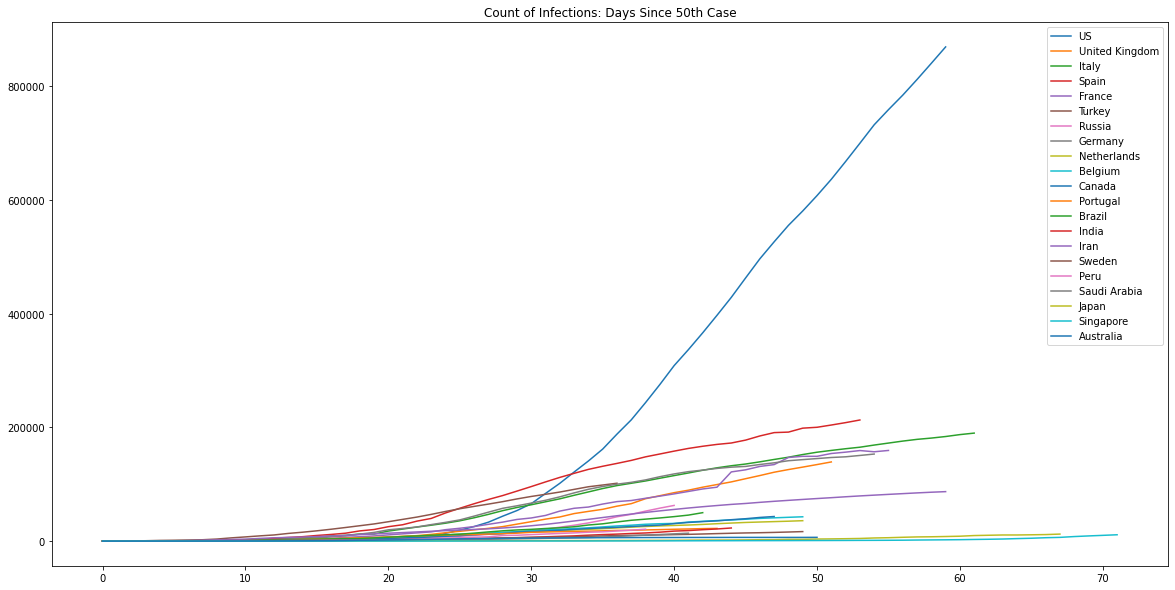

In [ ]:
# Static plot of the Days elapsed:  ex-USA

days_elapsed[['US', 'United Kingdom', 'Italy', 'Spain', 'France', 'Turkey', 'Russia',
              'Germany', 'Netherlands', 'Belgium', 'Canada', 'Portugal', 'Brazil',
       'India', 'Iran', 'Sweden', 'Peru', 'Saudi Arabia', 'Japan',
       'Singapore','Australia']].plot(
        title="Count of Infections: Days Since 50th Case", figsize=(20,10))

In [ ]:
##  Other Plotly imports

import plotly.graph_objects as go
import plotly.express as px        #not using yet
import plotly.offline as pyo



In [ ]:
# Another way to char this, using the Graph Objects module

countries = ['US', 'United Kingdom', 'Italy', 'Spain', 'France', 'Turkey', 'Russia',
       'Germany', 'Netherlands', 'Belgium', 'Canada', 'Portugal', 'Brazil',
       'India', 'Iran', 'Sweden', 'Peru', 'Saudi Arabia', 'Japan',
       'Singapore','China']

data = [ go.Scatter(x=days_elapsed.index,
                    y=days_elapsed[country],
                    mode='lines',
                    name=country) for country in countries ]


layout = go.Layout(
    title="Count of Confirmes Cases: Days since 50th case",
    autosize=True,
    hovermode="closest",  #hovermode="closest" for less clutter
    showlegend=True
    
    ##  Still need to figure out the log scale
)

    
fig = dict(data=data, layout=layout)

pyo.iplot(fig)


#  fig.update_yaxes(type="log", range=[0,6]) # log range: 10^0=1, 10^6=1,000,000
# py.iplot(fig, filename='jupyter-Nuclear Waste Sites on American Campuses')

# fig.add_trace(go.Line(days_elapsed))




In [ ]:
# Another way to char this, using the Graph Objects module  (ex-USA)

countries = ['United Kingdom', 'Italy', 'Spain', 'France', 'Turkey', 'Russia',
       'Germany', 'Netherlands', 'Belgium', 'Canada', 'Portugal', 'Brazil',
       'India', 'Iran', 'Sweden', 'Peru', 'Saudi Arabia', 'Japan',
       'Singapore','China']

data = [ go.Scatter(x=days_elapsed.index,
                    y=days_elapsed[country],
                    mode='lines',
                    name=country) for country in countries ]

# fig.update_xaxes(type=<VALUE>)

layout = go.Layout(
    title="Count of Confirmes Cases: Days since 50th case (ex-USA)",
    autosize=True,
    hovermode="x unified",  #hovermode="closest" for less clutter
    showlegend=True
    
    ##  Still need to figure out the log scale
)

    
fig = dict(data=data, layout=layout)

pyo.iplot(fig)

###  Population Normalization

In [ ]:
population = pd.read_csv("/Users/DougNewton/Coding/DXM/Assignment_1/country_populations.csv")

In [ ]:
#population.reset_index()
population = population.set_index("Country")

In [ ]:
# You can change the int(number) of countries shown 

pop_fig = px.bar(population.nlargest(30,"Population"), title="Top 20 Countries by Population")
pop_fig

In [ ]:
# Checking discrepancies in the country names
for index, row in filtered2.transpose().iterrows():
    if index not in population['Country'].to_list():
        print(index, " missing in Population file")
    else:
        pass
    
# Don't worry about remaining countries

Holy See  missing in Population file
MS Zaandam  missing in Population file
Sao Tome and Principe  missing in Population file


In [ ]:
# Only need to run this once...
population.replace('Ivory Coast',"Cote d'Ivoire",inplace=True)
population.replace('Myanmar','Burma',inplace=True)
population.replace('Cape Verde','Cabo Verde',inplace=True)
population.replace('DR Congo','Congo (Kinshasa)',inplace=True)
population.replace('Congo','Congo (Brazzaville)',inplace=True)
population.replace('Czech Republic','Czechia',inplace=True)
population.replace('South Korea','Korea, South',inplace=True)
population.replace('Taiwan','Taiwan*',inplace=True)
population.replace("Palestine","West Bank and Gaza",inplace=True)
population.replace("East Timor", "Timor-Leste",inplace=True)
population.rename(columns={"Country/Region":"Country"})

,Country,Population
0,China,1433783686
1,India,1366417754
2,US,329064917
3,Indonesia,270625568
4,Pakistan,216565318
...,...,...
230,Niue (New Zealand),1615
231,Tokelau (New Zealand),1340
232,Vatican City,799
233,Kosovo,1810000


## Let's merge the population datasets with CaseDFs we want to analyze

In [ ]:
ctry_confirmed = ctry_confirmed.rename(columns={"Country/Region":"Country"})
ctry_confirmed


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,714,784,840,906,933,996,1026,1092,1176,1279
Albania,0,0,0,0,0,0,0,0,0,0,...,475,494,518,539,548,562,584,609,634,663
Algeria,0,0,0,0,0,0,0,0,0,0,...,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
Andorra,0,0,0,0,0,0,0,0,0,0,...,659,673,673,696,704,713,717,717,723,723
Angola,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,24,24,24,24,25,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,308,374,374,402,418,437,449,466,474,480
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Had to remove the "/" value for the merge to work
# confirmed_per_capita = population.merge(ctry_confirmed, on="Country")

confirmed_per_capita



,Country,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,China,1433783686,548,643,920,1406,2075,2877,5509,6087,...,83306,83356,83403,83760,83787,83805,83817,83853,83868,83884
1,India,1366417754,0,0,0,0,0,0,0,0,...,11487,12322,13430,14352,15722,17615,18539,20080,21370,23077
2,US,329064917,1,1,2,2,5,5,5,5,...,607670,636350,667592,699706,732197,758809,784326,811865,840351,869170
3,Indonesia,270625568,0,0,0,0,0,0,0,0,...,4839,5136,5516,5923,6248,6575,6760,7135,7418,7775
4,Pakistan,216565318,0,0,0,0,0,0,0,0,...,5837,6383,6919,7025,7638,8348,8418,9565,10076,11155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Monaco,38964,0,0,0,0,0,0,0,0,...,93,93,93,94,94,94,94,94,94,94
178,Liechtenstein,38019,0,0,0,0,0,0,0,0,...,79,79,79,79,79,81,81,81,81,81
179,San Marino,33860,0,0,0,0,0,0,0,0,...,371,372,426,435,455,461,462,476,488,501
180,Kosovo,1810000,0,0,0,0,0,0,0,0,...,387,387,449,480,510,510,510,510,510,510


In [ ]:
confirmed_per_capita.set_index("Country")

,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country,,,,,,,,,,,,,,,,,,,,,
China,1433783686,548,643,920,1406,2075,2877,5509,6087,8141,...,83306,83356,83403,83760,83787,83805,83817,83853,83868,83884
India,1366417754,0,0,0,0,0,0,0,0,1,...,11487,12322,13430,14352,15722,17615,18539,20080,21370,23077
US,329064917,1,1,2,2,5,5,5,5,5,...,607670,636350,667592,699706,732197,758809,784326,811865,840351,869170
Indonesia,270625568,0,0,0,0,0,0,0,0,0,...,4839,5136,5516,5923,6248,6575,6760,7135,7418,7775
Pakistan,216565318,0,0,0,0,0,0,0,0,0,...,5837,6383,6919,7025,7638,8348,8418,9565,10076,11155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Monaco,38964,0,0,0,0,0,0,0,0,0,...,93,93,93,94,94,94,94,94,94,94
Liechtenstein,38019,0,0,0,0,0,0,0,0,0,...,79,79,79,79,79,81,81,81,81,81
San Marino,33860,0,0,0,0,0,0,0,0,0,...,371,372,426,435,455,461,462,476,488,501


In [ ]:
confirmed_per_capita.to_csv("pop.csv")
    
# Sending this to quick-calc in excel

In [ ]:
confirmed_per_capita_calc = pd.read_csv("pop_rel.csv").set_index(["Country", "Population"]).drop("Diamond Princess")
confirmed_per_capita_calc

,,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
Country,Population,,,,,,,,,,,,,,,,,,,,,
China,1433783686,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
India,1366417754,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
US,329064917,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,...,0.2%,0.2%,0.2%,0.2%,0.2%,0.2%,0.2%,0.2%,0.3%,0.3%
Indonesia,270625568,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
Pakistan,216565318,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Saint Kitts and Nevis,52823,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,...,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
Monaco,38964,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,...,0.2%,0.2%,0.2%,0.2%,0.2%,0.2%,0.2%,0.2%,0.2%,0.2%
Liechtenstein,38019,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,...,0.2%,0.2%,0.2%,0.2%,0.2%,0.2%,0.2%,0.2%,0.2%,0.2%


In [ ]:
##  Charting the above:  what's it actually saying?

# confirmed_per_capita_calc["1/22/20"].plot()


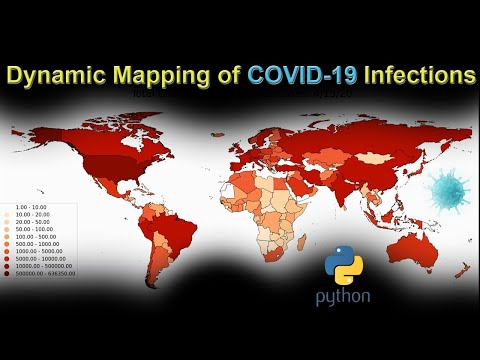

In [ ]:
#  Keep this one for the future:  Chloropleth maps
from IPython.display import YouTubeVideo
YouTubeVideo("vLEA8dCfusQ")

In [ ]:
world = gpd.read_file(r"/Users/DougNewton/Coding/DXM/Assignment_1/map/World_Map.shp")
world

,NAME,geometry
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
...,...,...
240,Saint Barthelemy,"POLYGON ((-63.02834 18.01555, -63.03334 18.015..."
241,Guernsey,"POLYGON ((-2.59083 49.42249, -2.59722 49.42249..."
242,Jersey,"POLYGON ((-2.01500 49.21416, -2.02111 49.17722..."
243,South Georgia South Sandwich Islands,"MULTIPOLYGON (((-27.32584 -59.42722, -27.29806..."


In [ ]:
# Checking discrepancies in the country names
for index, row in filtered2.transpose().iterrows():
    if index not in world['NAME'].to_list():
        print(index, " missing in ShapeFile")
    else:
        pass

# Intentionally going to leave these data points out... # MS Zaandam?

Diamond Princess  missing in ShapeFile
Holy See  missing in ShapeFile
Kosovo  missing in ShapeFile
MS Zaandam  missing in ShapeFile
South Sudan  missing in ShapeFile


In [ ]:
# Making sure the country names line up

world.replace('Brunei Darussalam','Brunei',inplace=True)
world.replace('Cape Verde','Cabo Verde',inplace=True)
world.replace('Democratic Republic of the Congo','Congo (Kinshasa)',inplace=True)
world.replace('Congo','Congo (Brazzaville)',inplace=True)
world.replace('Czech Republic','Czechia',inplace=True)
world.replace('Swaziland','Eswatini',inplace=True)
world.replace('Iran (Islamic Republic of)','Iran',inplace=True)
world.replace('Korea, Republic of','Korea, South',inplace=True)
world.replace("Lao People's Democratic Republic","Laos",inplace=True)
world.replace("Libyan Arab Jamahiriya","Libya",inplace=True)
world.replace('Republic of Moldova','Moldova',inplace=True)
world.replace('The former Yugoslav Republic of Macedonia','North Macedonia',inplace=True)
world.replace('Syrian Arab Republic','Syria',inplace=True)
world.replace('Taiwan','Taiwan*',inplace=True)
world.replace('United Republic of Tanzania','Tanzania',inplace=True)
world.replace('United States','US',inplace=True)
world.replace("Palestine","West Bank and Gaza",inplace=True)
world.replace('Viet Nam','Vietnam',inplace=True)

<AxesSubplot:>

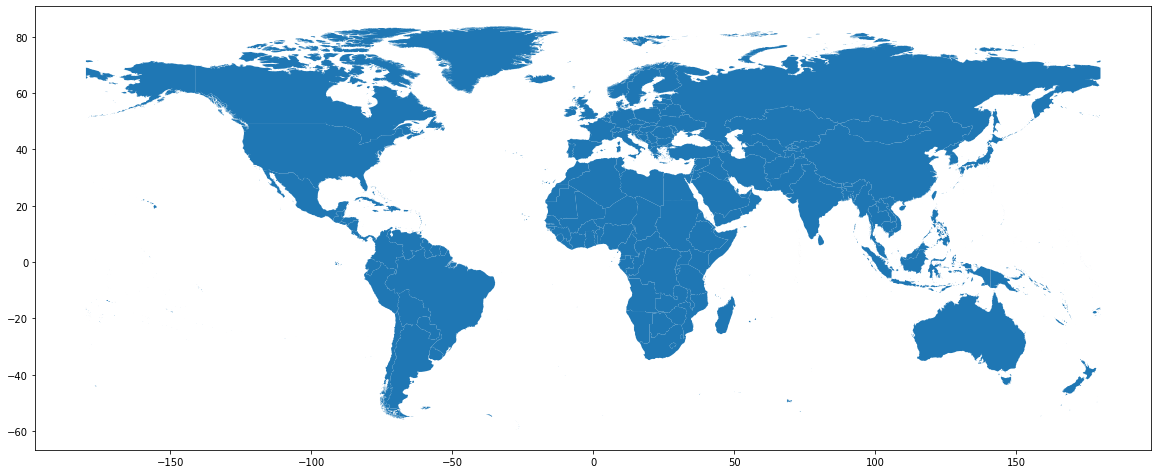

In [ ]:
world.plot(figsize=(20,10))

## Let's show the World Population on a Map

In [ ]:
world_pop = world.copy().rename(columns={"NAME":"Country"}).merge(population, on="Country")
world_pop

,Country,geometry,Population
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",97118
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",43053054
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",10047718
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",2880917
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",2957731
...,...,...,...
186,Marshall Islands,"MULTIPOLYGON (((168.11359 5.60028, 168.10800 5...",58791
187,San Marino,"POLYGON ((12.41580 43.95795, 12.45055 43.97972...",33860
188,Western Sahara,"POLYGON ((-15.74200 21.33828, -15.89222 21.338...",582463
189,Serbia,"POLYGON ((20.07142 42.56091, 20.10583 42.64278...",8772235


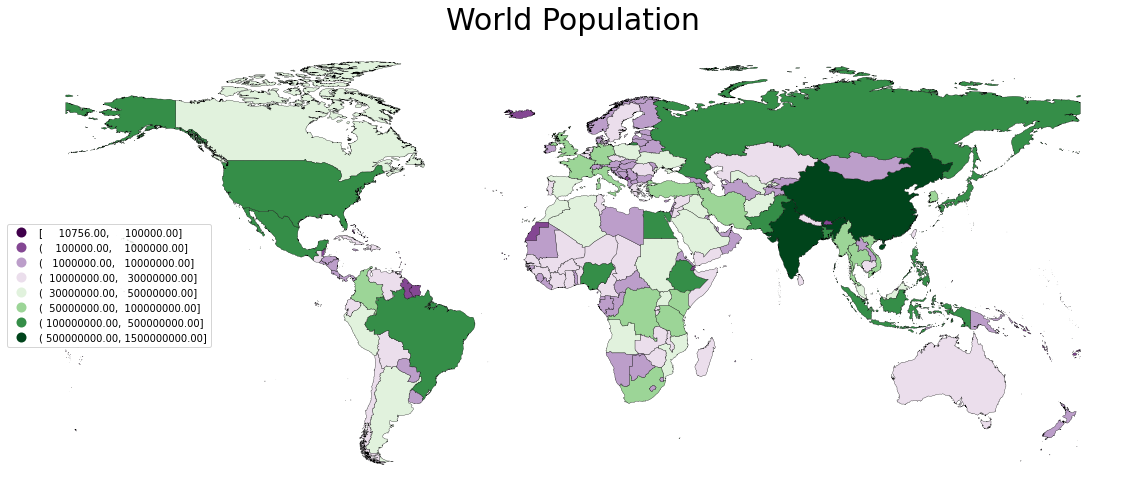

In [ ]:
# World Population in a Chart  (Dark Green:  Large)

ax = world_pop.plot(column = 'Population',   # change this fig 
            cmap = 'PRGn',
            figsize = (20,10),
            legend = True,
            scheme = 'user_defined',
            classification_kwds = {'bins':[100000,1000000,10000000,30000000,50000000,100000000,500000000,1500000000]},
            edgecolor = 'black',
            linewidth = 0.3)

ax.set_title("World Population", fontdict = {'fontsize':30}, pad = 12)

ax.set_axis_off()

ax.get_legend().set_bbox_to_anchor((0.18,0.6))

In [ ]:
# Change Country column heading for Merge Operation

ctry_confirmed = ctry_confirmed.reset_index().rename(columns={"Country/Region": "NAME"})
ctry_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 94 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NAME     185 non-null    object
 1   1/22/20  185 non-null    int64 
 2   1/23/20  185 non-null    int64 
 3   1/24/20  185 non-null    int64 
 4   1/25/20  185 non-null    int64 
 5   1/26/20  185 non-null    int64 
 6   1/27/20  185 non-null    int64 
 7   1/28/20  185 non-null    int64 
 8   1/29/20  185 non-null    int64 
 9   1/30/20  185 non-null    int64 
 10  1/31/20  185 non-null    int64 
 11  2/1/20   185 non-null    int64 
 12  2/2/20   185 non-null    int64 
 13  2/3/20   185 non-null    int64 
 14  2/4/20   185 non-null    int64 
 15  2/5/20   185 non-null    int64 
 16  2/6/20   185 non-null    int64 
 17  2/7/20   185 non-null    int64 
 18  2/8/20   185 non-null    int64 
 19  2/9/20   185 non-null    int64 
 20  2/10/20  185 non-null    int64 
 21  2/11/20  185 non-null    int64 
 22  2/

In [ ]:
### Make sure this is run only once

# world = world.reset_index().info()

In [ ]:
world["NAME"] = world["NAME"].astype(str)
ctry_confirmed["NAME"] = ctry_confirmed["NAME"].astype(str)

In [ ]:
print("World", world.columns)
print("Ctry", ctry_confirmed.columns)

World Index(['NAME', 'geometry'], dtype='object')
Ctry Index(['NAME', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20',
       '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20',
       '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20',
       '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/1

In [ ]:
# Merging the data with the world.plot
map_df = world.merge(ctry_confirmed, on="NAME") #, how="right")
map_df.head()


,NAME,geometry,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,Antigua and Barbuda,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",0,0,0,0,0,0,0,0,...,23,23,23,23,23,23,23,23,24,24
1,Algeria,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",0,0,0,0,0,0,0,0,...,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
2,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",0,0,0,0,0,0,0,0,...,1197,1253,1283,1340,1373,1398,1436,1480,1518,1548
3,Albania,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",0,0,0,0,0,0,0,0,...,475,494,518,539,548,562,584,609,634,663
4,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",0,0,0,0,0,0,0,0,...,1067,1111,1159,1201,1248,1291,1339,1401,1473,1523


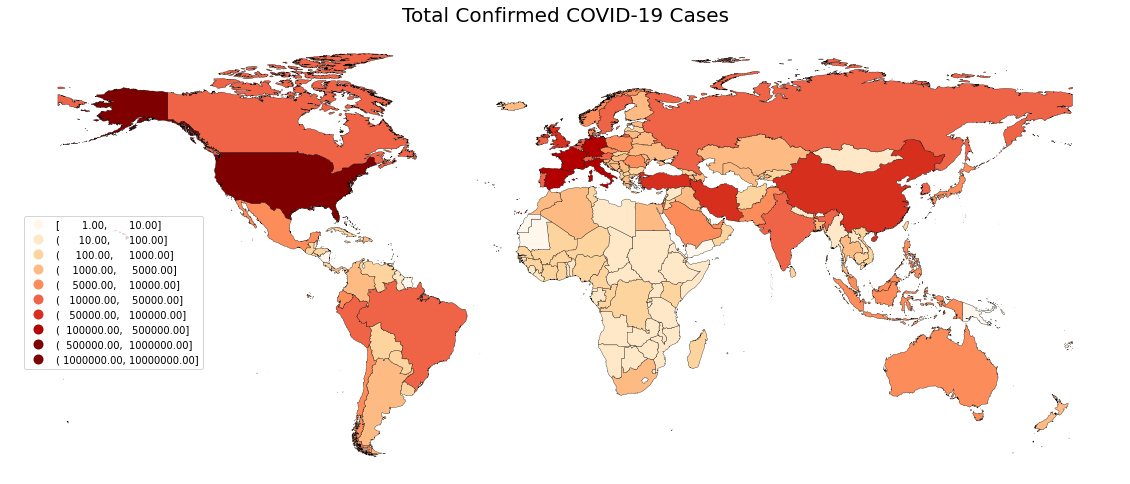

In [ ]:
# Select date column below:

ax = map_df.plot(column = '4/15/20',   # change this fig 
            cmap = 'OrRd',
            figsize = (20,10),
            legend = True,
            scheme = 'user_defined',
            classification_kwds = {'bins':[10,100,1000,5000,10000,50000, 100000,500000,1000000,10000000]},
            edgecolor = 'black',
            linewidth = 0.3)

ax.set_title("Total Confirmed COVID-19 Cases", fontdict = {'fontsize':20}, pad = 12)

ax.set_axis_off()

ax.get_legend().set_bbox_to_anchor((0.18,0.6))

## DON'T RUN THIS AGAIN SAVE SPACE:  See GIF file attached

In [ ]:
# This is an inefficient (albeit cool) way to show the progression of COVID cases
# Use of the Dash library makes this easier

image_frames = []

for dates in map_df.columns.to_list()[2:] :
    
    ax = map_df.plot(column = dates,
                cmap = 'OrRd',
                figsize = (20,10),
                legend = True,
                scheme = 'user_defined',
                classification_kwds = {'bins':[10,20,50,100,1000,5000,10000,50000,100000,500000,1000000,10000000]},
                edgecolor = 'black',
                linewidth = 0.3)

    ax.set_title("Total Confirmed COVID-19 Cases "+ dates, fontdict = {'fontsize':20}, pad = 12)

    ax.set_axis_off()

    ax.get_legend().set_bbox_to_anchor((0.18,0.6))
    
    img = ax.get_figure()
    
    f = io.BytesIO()
    img.savefig(f, format = 'png', bbox_inches = 'tight')
    f.seek(0)
    image_frames.append(PIL.Image.open(f))
        

# Create the GIF animation
image_frames[0].save("Dynamic COVID-19 Map.gif", format = "GIF",
                    append_images = image_frames[1:],
                    save_all = True, duration = 300,
                    loop = 1)

f.close()

SyntaxError: unexpected EOF while parsing (<ipython-input-572-1e246a36178f>, line 37)